In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
import matplotlib.gridspec as gridspec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Quick looks at TESS data as I get to it

In [4]:
#Lmcom, p = 372.52min
tessfits = '/home/david/work/pceb/tess/MAST_2020-06-16T1742/TESS/tess2020049080258-s0022-0000000082347011-0174-s/tess2020049080258-s0022-0000000082347011-0174-s_lc.fits' 

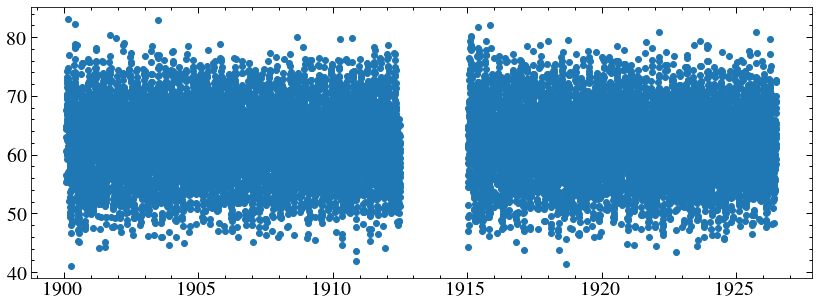

In [11]:
data = fits.getdata(tessfits, 1)

t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
t, f, e = t[q==0], f[q==0], e[q==0]
#fit = np.polyval((np.polyfit(t,f,1)), t)
#f = (f/fit)-1
#e = (e/fit)-1
plt.scatter(t,f)


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


372.64935990170846 min


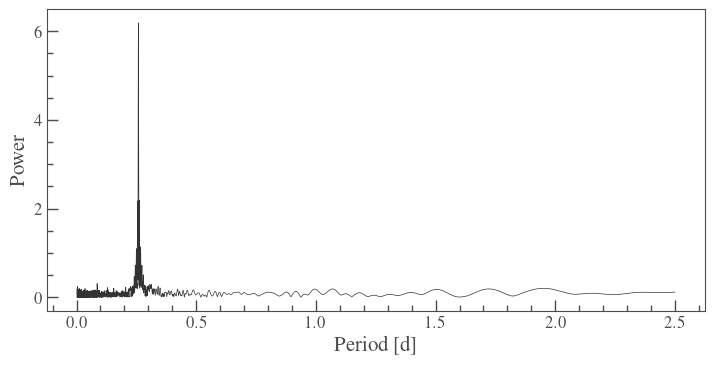

In [16]:
lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)
pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=2.5*u.day)
pg.plot()
print(pg.period_at_max_power.to(u.min))

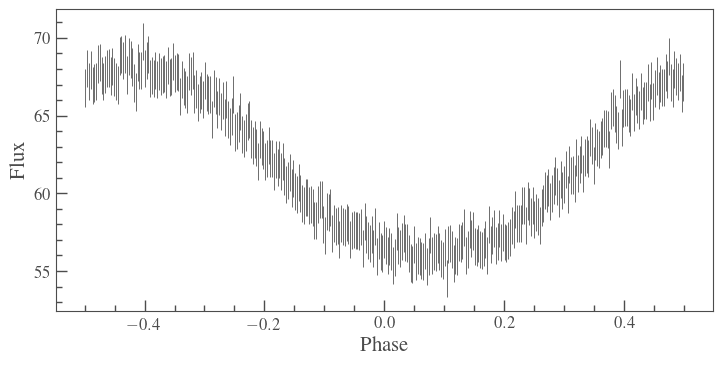

In [17]:
lcfold = lc.fold(pg.period_at_max_power).bin(50)
lcfold.errorbar()

/home/david/work/pceb/tess/MAST_2020-06-16T1851/TESS/tess2018263035959-s0003-0000000032307067-0123-s/tess2018263035959-s0003-0000000032307067-0123-s_lc.fits


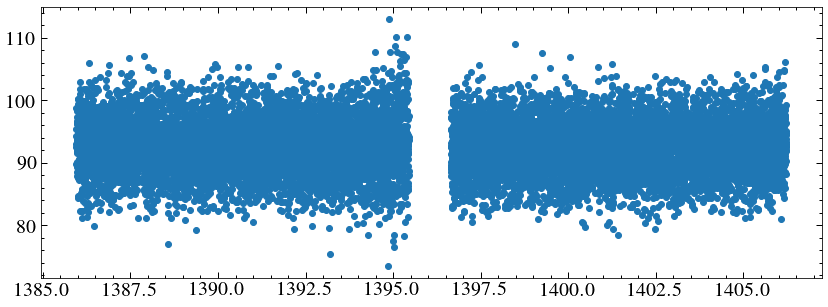

/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


114.3908386400543 min


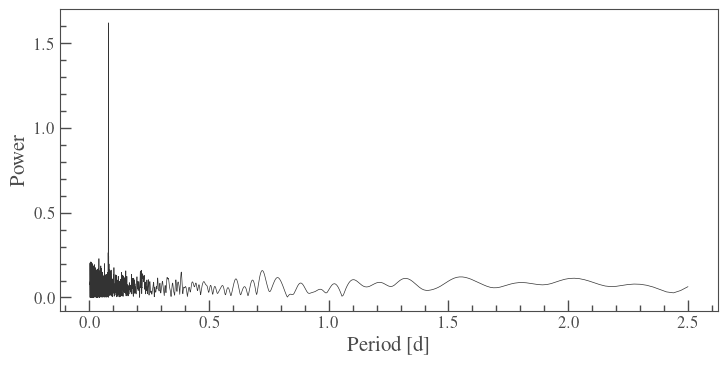

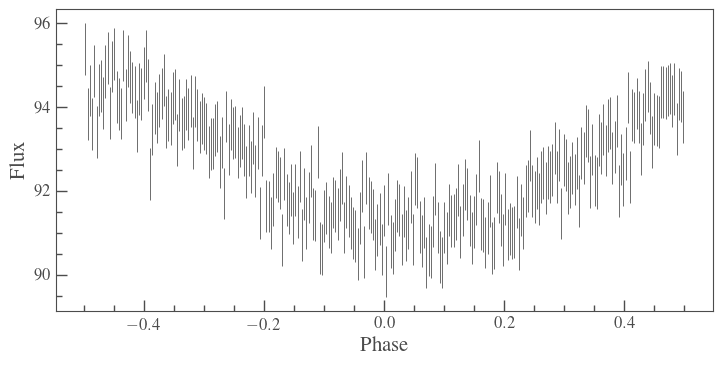

In [26]:
#wd0137,p = 116 min
#four fits files retuned, should be the one endon 067...
path = '/home/david/work/pceb/tess/MAST_2020-06-16T1851/TESS/tess2018263035959-s0003-0000000032307067-0123-s/'
#for p in os.listdir(path):
fitspath  = glob.glob(path+'*lc.fits')[0]
print(fitspath)
data = data = fits.getdata(fitspath, 1)

t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
t, f, e = t[q==0], f[q==0], e[q==0]
plt.scatter(t,f)
plt.show()
lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)
pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=2.5*u.day)
pg.plot()
print(pg.period_at_max_power.to(u.min))
plt.show()
lcfold = lc.fold(pg.period_at_max_power).bin(50)
lcfold.errorbar()